# Imports

In [1]:
%load_ext autoreload
%autoreload 2

import numpy as np
import matplotlib.pyplot as plt

from HANKStickyModel import HANKStickyModelClass

# Solve the model

In [2]:
def solution_routine(model, do_print=False):
    """ solve model """
    # init model
    print('\r'+f' -------- Model: {model.name} ---------')
    # solve model
    print("\r"+'Find steady state  ',end="")
    model.find_ss(do_print=do_print)
    print("\r"+'Compute Jacobians  ',end="")
    model.compute_jacs(do_print=do_print)
    print("\r"+'Find transition path',end="")
    model.find_transition_path(do_print=do_print, do_print_unknowns=False)
    print("\r"+'Find IRFs           ',end="")
    model.find_IRFs(do_print=do_print)
    print("\r"+'Done                ',end="")
    # return model


In [3]:
model = HANKStickyModelClass(name='baseline', par={'inattention': 0.935})

In [4]:
par = model.par
ss = model.ss
path = model.path
sim = model.sim

In [5]:
solution_routine(model)

 -------- Model: baseline ---------
Done                

# Testing

note: inputs = steady state value -> expected: constant value (straigt line)

household problem solved along transition path in 3.0 secs
household problem simulated along transition in 2.0 secs



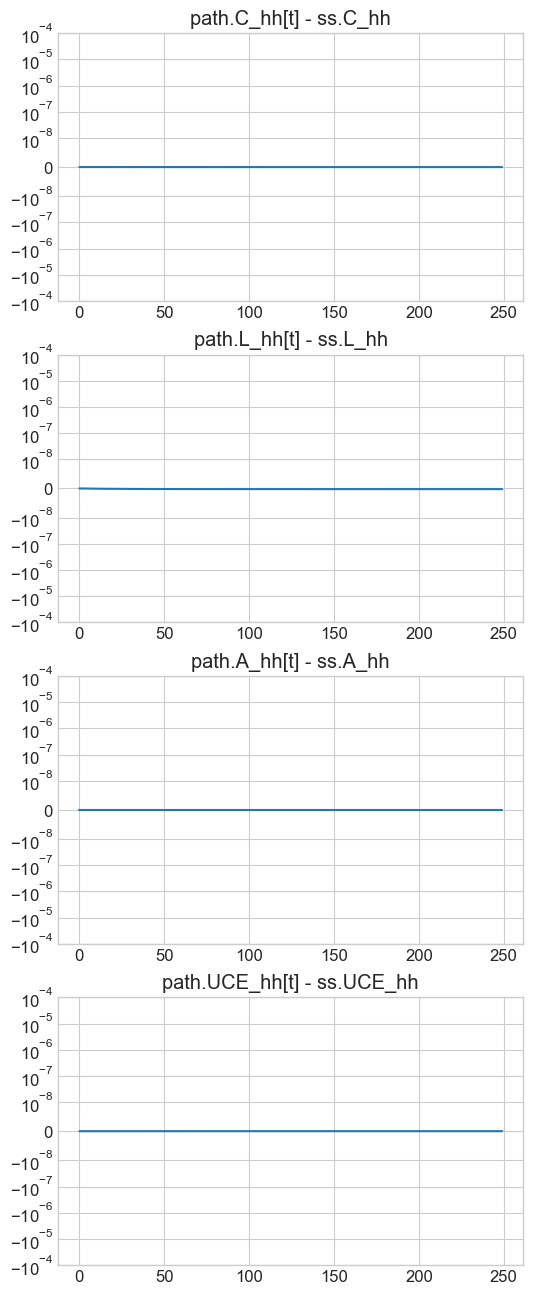

In [6]:
model.test_hh_path()

In [7]:
model.test_path()

note: inputs = steady state value -> expected: no difference to steady state and zero errors

difference to value at steady state:
A              : t0 =  3.5e-10, max abs.  3.5e-10
B              : t0 =  0.0e+00, max abs.  0.0e+00
clearing_A     : t0 =  0.0e+00, max abs.  1.2e-14
clearing_L     : t0 =  3.5e-10, max abs.  3.5e-10
clearing_Y     : t0 = -3.7e-12, max abs.  8.6e-12
Div_int        : t0 =  0.0e+00, max abs.  0.0e+00
Div_k          : t0 =  0.0e+00, max abs.  0.0e+00
Div            : t0 =  0.0e+00, max abs.  0.0e+00
eg             : t0 =  0.0e+00, max abs.  0.0e+00
ez             : t0 =  0.0e+00, max abs.  0.0e+00
em             : t0 =  0.0e+00, max abs.  0.0e+00
G              : t0 =  0.0e+00, max abs.  0.0e+00
i              : t0 =  0.0e+00, max abs.  0.0e+00
I              : t0 =  0.0e+00, max abs.  0.0e+00
Ip             : t0 =  0.0e+00, max abs.  0.0e+00
K              : t0 =  0.0e+00, max abs.  0.0e+00
L              : t0 = -9.2e-01, max abs.  9.2e-01
N              : t0

note: differences should only be due to numerical errors

household inattention = 0.935
-> sticky information jacs based on direct method wont be correct
direct method:
finding Jacobian wrt. ghost          : 0 10 20 30 40 [computed in 7.1 secs]
finding Jacobian wrt. ez             : 0 10 20 30 40 [computed in 7.1 secs]
finding Jacobian wrt. ra             : 0 10 20 30 40 [computed in 6.9 secs]
finding Jacobian wrt. rl             : 0 10 20 30 40 [computed in 6.8 secs]
finding Jacobian wrt. tau            : 0 10 20 30 40 [computed in 6.9 secs]
finding Jacobian wrt. wN             : 0 10 20 30 40 [computed in 6.7 secs]
household Jacobian computed in 42.0 secs

fake news method:
one step deviation from steady state calculated in 0.0 secs
curly_Y and curly_D calculated for ez              in 3.5 secs
curly_Y and curly_D calculated for ra              in 3.5 secs
curly_Y and curly_D calculated for rl              in 3.5 secs
curly_Y and curly_D calculated for tau             in 3.5 secs
cur

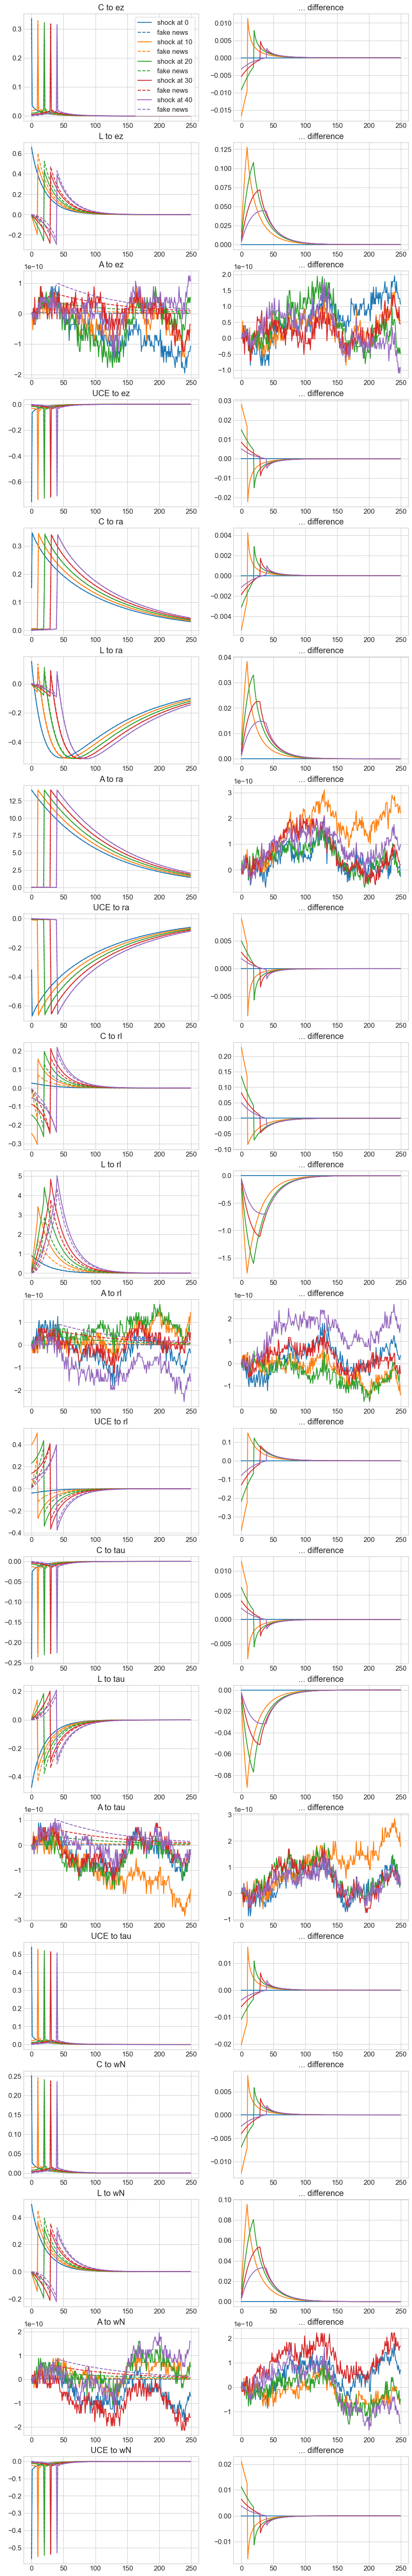

In [9]:
s_list = [0,10,20,30,40]
model.test_jacs(s_list=s_list)

# Plotting

### shocks ###


C:\Users\Yannik\Meine Ablage\Uni\Master\Master Thesis\Thesis_Code\Hump_Jump_Replication\GEModelTools\figures.py:123: RuntimeWarning: invalid value encountered in true_divide
  ax.plot(np.arange(T_max),100*(pathvalue[:T_max]/ssvalue-1),label=label)
C:\Users\Yannik\Meine Ablage\Uni\Master\Master Thesis\Thesis_Code\Hump_Jump_Replication\GEModelTools\figures.py:125: RuntimeWarning: invalid value encountered in true_divide
  ax.plot(np.arange(T_max),100*(IRFvalue[:T_max]/ssvalue-1),ls=ls_linear,label=label_linear)


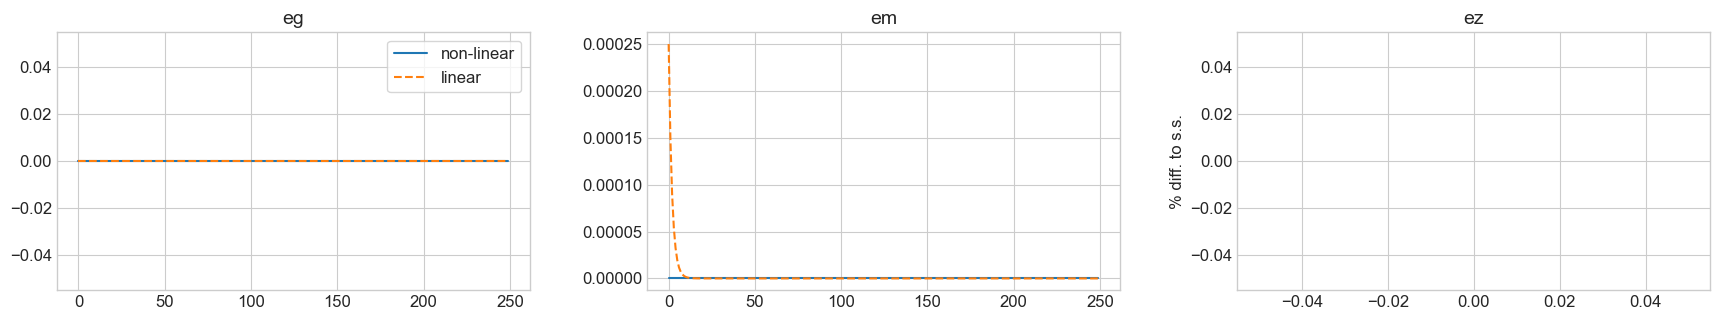


### varnames ###


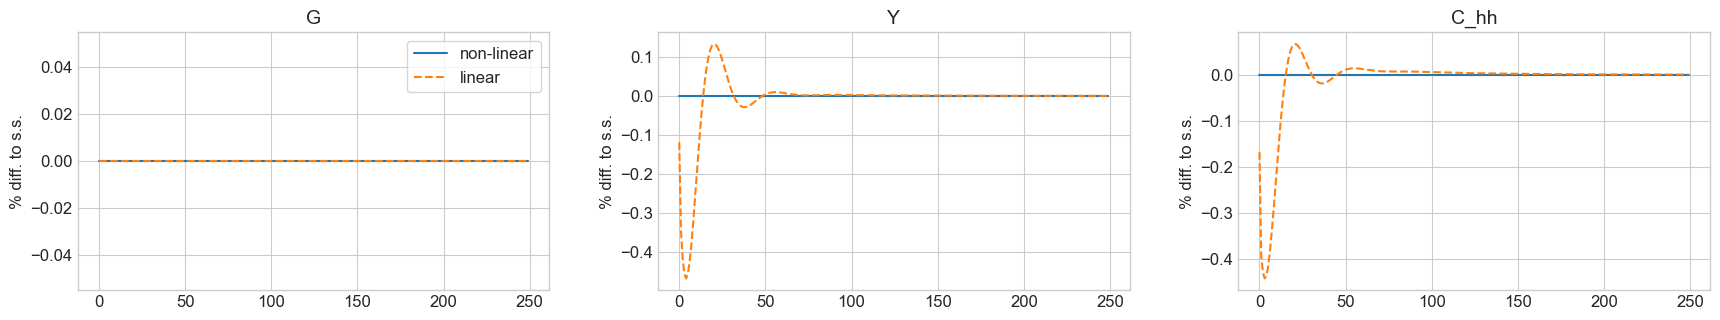


### tagets ###


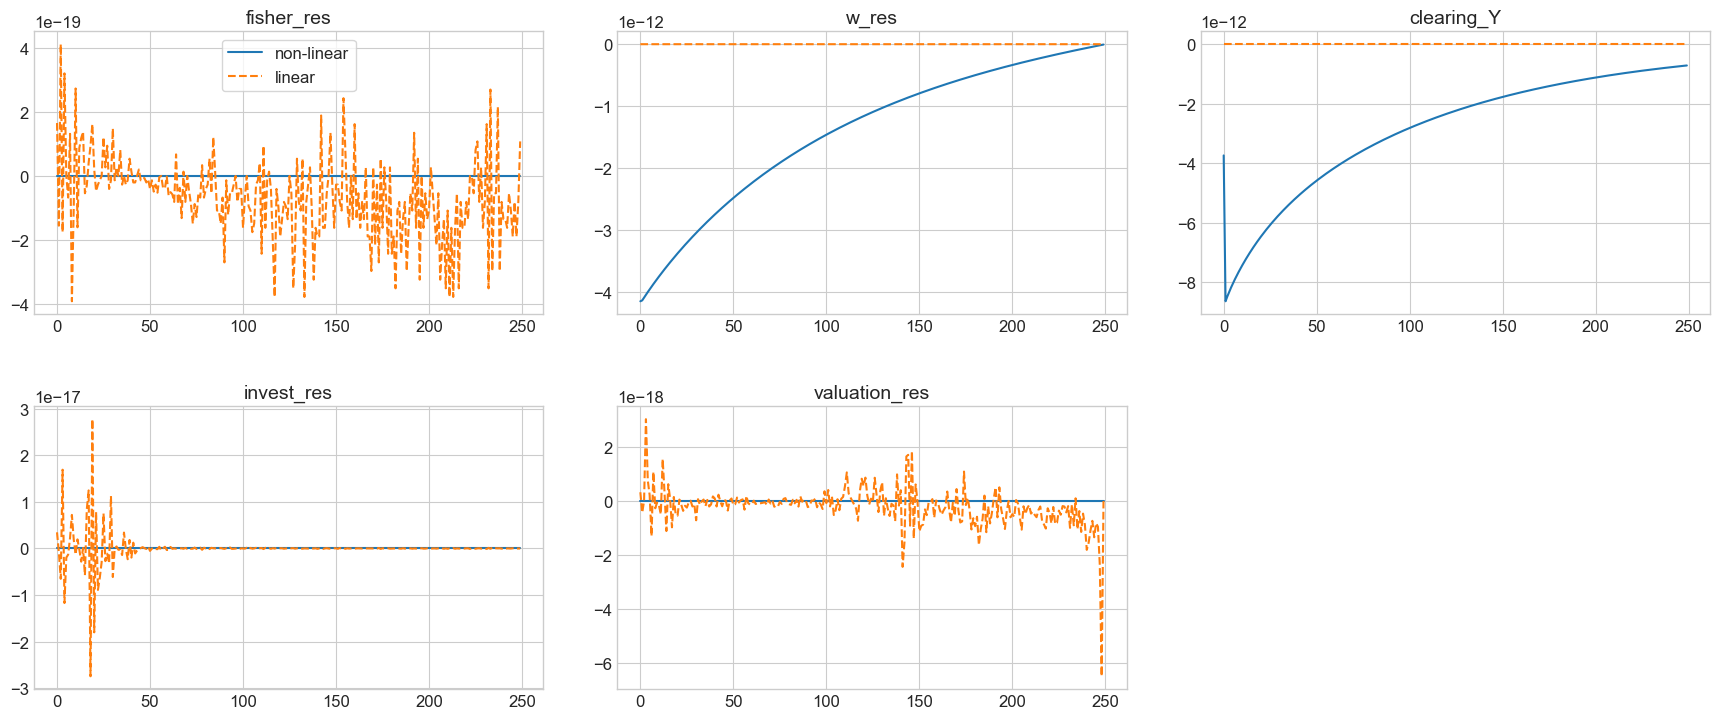

In [10]:
paths = ['G','Y','C_hh']
lvl_value = ['eg', 'em', 'i', 'Pi', 'Pi_w','clearing_Y']
abs_diff = ['r', 'ra', 'rl', 'i']
facs = {'r':100,'ra':100,'rl':100}
model.show_IRFs(paths,lvl_value=lvl_value,abs_diff=abs_diff,facs=facs,ncols=3,T_max=par.T,do_linear=True,do_shocks=True)

# Misc

In [ ]:
# model.print_unpack_varlist()

In [ ]:
# model.check_non_lin(0)

In [ ]:
# print(np.max(path.A - path.A_hh))